In this Section we will do EDA including training and finding the best model to be deployed to our website.
To be noted, we need to find the right ML model to recommend product to our customer based on availble variables. So we need to explore the dataset first and then we do "Feature engineering" and the last step we find what is the best model to use for our recommendation system.
We use the newest dataset that we obtained from generating the old dataset.

In [1]:
#read dataset
import pandas as pd
df = pd.read_csv("FixedDataset.csv")

In [2]:
df = df.drop(df.columns[0], axis=1)

In [3]:
df.head(5)

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,1,25,120,101,2023-01-01,Electronics,500,4.5
2,1,25,120,101,2023-01-01,Electronics,500,4.5
3,1,25,120,101,2023-01-01,Electronics,500,4.5
4,1,25,120,101,2023-01-01,Electronics,500,4.5


In [6]:
#counting the total customer based on their id
df['customer_id'].nunique()

82

In [7]:
df = df.drop_duplicates() #drop duplicates data

<Figure size 800x600 with 0 Axes>

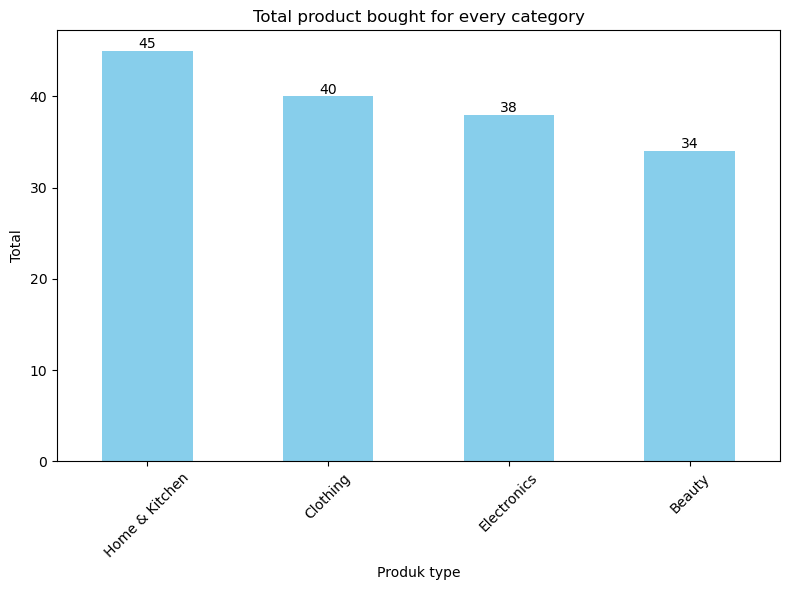

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grafik batang dengan seaborn
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
counts = df['category'].value_counts()
bars = counts.plot(kind='bar', color='skyblue')
plt.title('Total product bought for every category')
plt.xlabel('Produk type')
plt.ylabel('Total')
plt.xticks(rotation=45)  # x label rotation

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

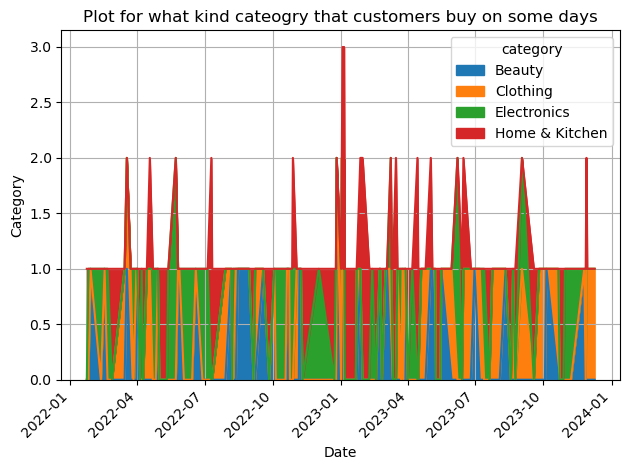

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Hitung jumlah pembelian untuk setiap kategori produk pada setiap tanggal
purchase_counts = df.groupby(['purchase_date', 'category']).size().unstack(fill_value=0)

# Buat grafik area stacked
plt.figure(figsize=(10, 6))
purchase_counts.plot(kind='area', stacked=True)
plt.title('Plot for what kind cateogry that customers buy on some days')
plt.xlabel('Date')
plt.ylabel('Category')
plt.xticks(rotation=45)  # Putar label sumbu x untuk legibilitas
plt.grid(True)
plt.tight_layout()
plt.show()

